In [180]:
# Day 1: World Happiness Index Prediction 

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [182]:
DataSet = pd.read_csv("World Happiness Report.csv")

In [183]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           153 non-null    object 
 1   Happiness Rank    153 non-null    int64  
 2   Happiness Score   153 non-null    float64
 3   Economy           153 non-null    float64
 4   Family            153 non-null    float64
 5   Health            153 non-null    float64
 6   Freedom           153 non-null    float64
 7   Generosity        153 non-null    float64
 8   Corruption        153 non-null    float64
 9   Dystopia          153 non-null    float64
 10  Job Satisfaction  151 non-null    float64
 11  Region            153 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 14.5+ KB


In [184]:
print("Mean :", DataSet["Happiness Score"].mean)

Mean : <bound method Series.mean of 0      7.537
1      7.522
2      7.504
3      7.494
4      7.469
       ...  
148    3.471
149    3.462
150    3.349
151    2.905
152    2.693
Name: Happiness Score, Length: 153, dtype: float64>


In [185]:
print("Median :", DataSet["Happiness Score"].median)

Median : <bound method Series.median of 0      7.537
1      7.522
2      7.504
3      7.494
4      7.469
       ...  
148    3.471
149    3.462
150    3.349
151    2.905
152    2.693
Name: Happiness Score, Length: 153, dtype: float64>


In [186]:
#Main aim predicting the  happiness index

In [187]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
DataSet['Region']= label_encoder.fit_transform(DataSet['Region'])
DataSet['Country']= label_encoder.fit_transform(DataSet['Country'])

In [188]:
features = ["Country","Happiness Rank","Economy","Family","Health","Freedom","Generosity","Corruption","Dystopia","Region"]

X = DataSet[features]
y = DataSet["Happiness Score"]

In [189]:
print(DataSet["Region"])

0      6
1      6
2      6
3      6
4      6
      ..
148    0
149    1
150    0
151    0
152    0
Name: Region, Length: 153, dtype: int32


In [190]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = (train_test_split(X, y, test_size = 1/2, random_state = 0))

In [191]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (76, 10)
X_test shape: (77, 10)
y_train shape: (76,)
y_test shape: (77,)


In [192]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [193]:
y_pred = reg.predict(X_test)

In [194]:
from sklearn.metrics import mean_squared_error, r2_score

In [195]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [196]:
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')
print(f'MAE: {mae}')

MSE: 8.956709830600719e-08
RMSE: 0.00029927762747323296
R² Score: 0.9999999221409323
MAE: 0.000257795359045543


In [197]:
print("Model Coefficients:", reg.coef_)
print("Model Intercept:", reg.intercept_)


Model Coefficients: [ 2.44e-07 -2.37e-06  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00
  1.00e+00  1.00e+00  1.37e-05]
Model Intercept: 0.0009132518857324357


In [198]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (77, 10)
y_test shape: (77,)


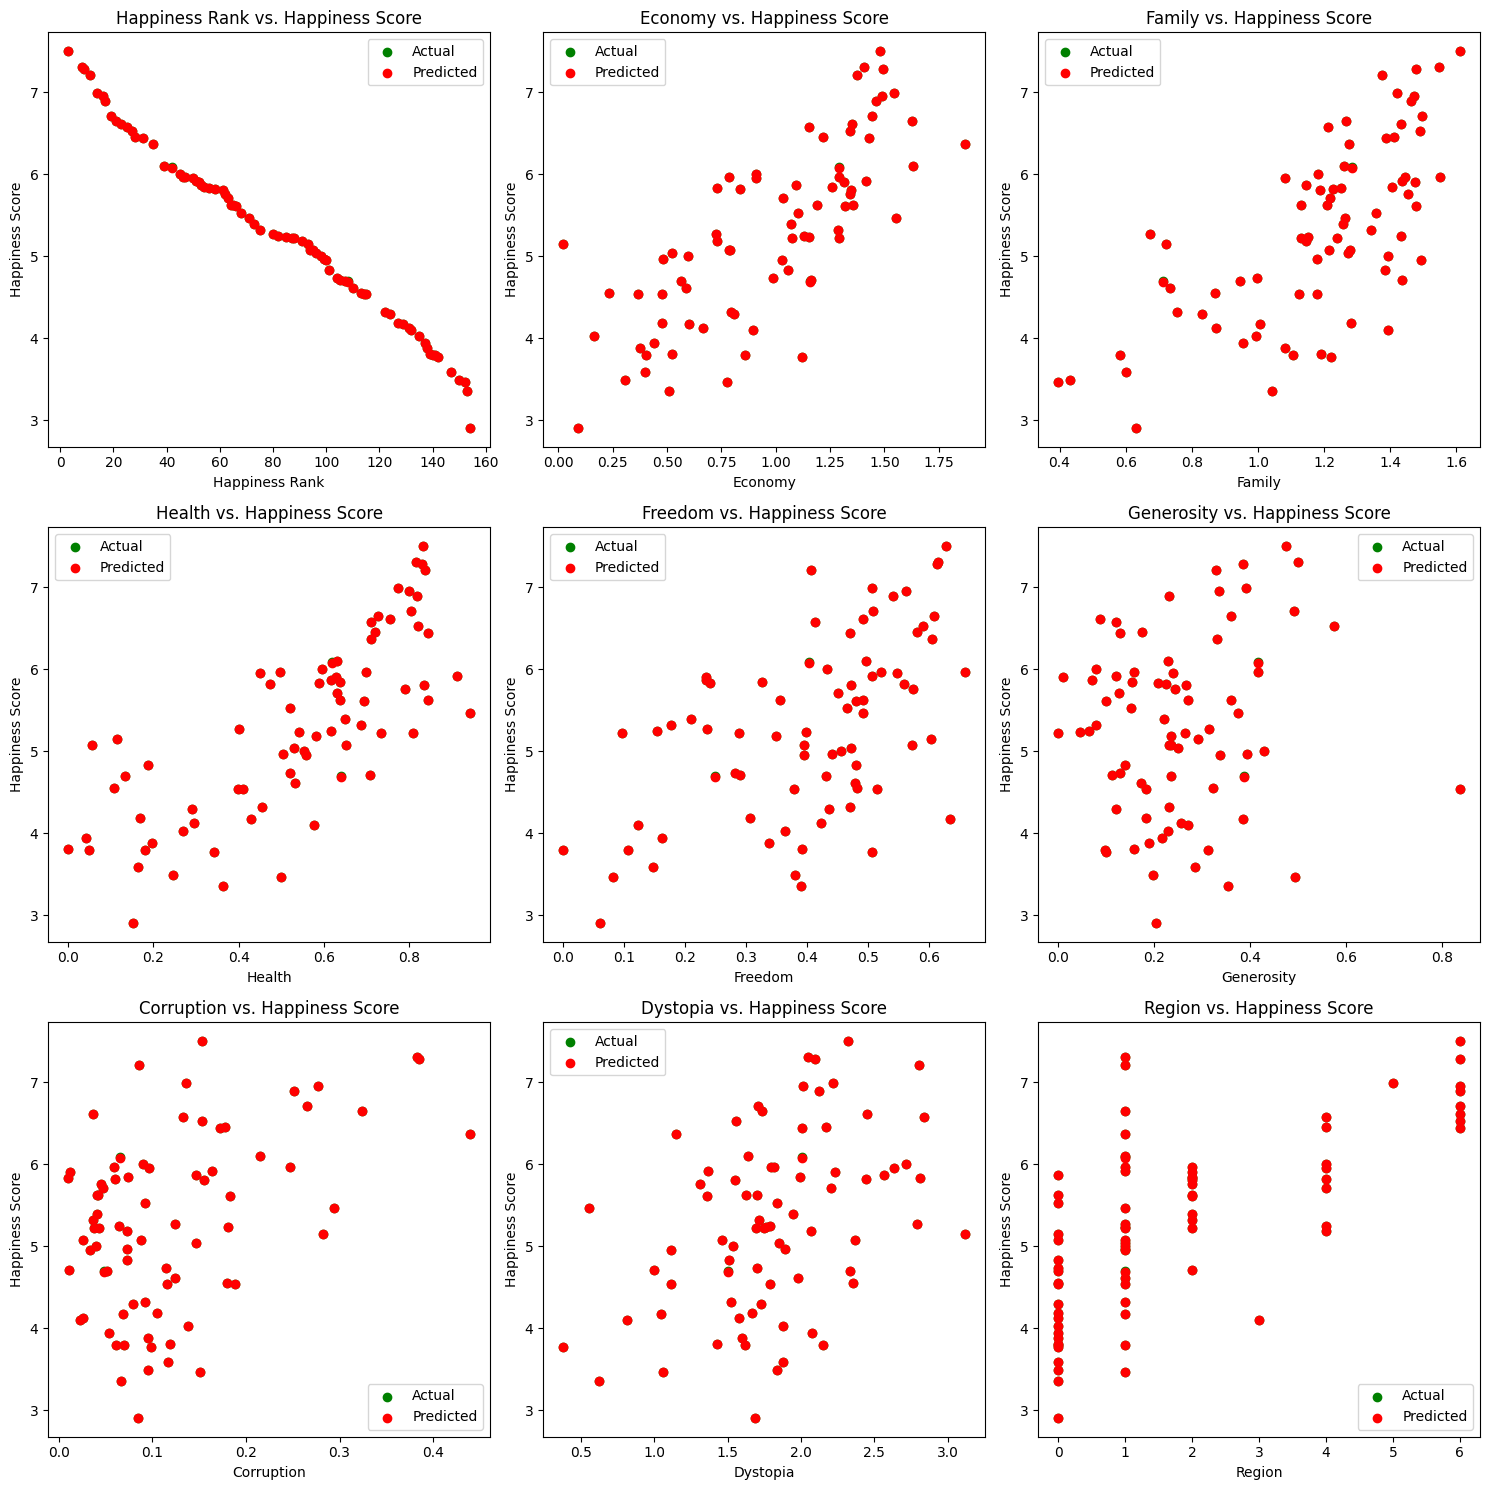

In [199]:
fig, axes = plt.subplots(3,3, figsize=(15, 15))
axes = axes.ravel()
countries = ["Happiness Rank","Economy","Family","Health","Freedom","Generosity","Corruption","Dystopia","Region"]

for i, col in enumerate(countries):
    axes[i].scatter(X_test[col], y_test, color='green', label='Actual')
    axes[i].scatter(X_test[col], y_pred, color='red', label='Predicted')
    axes[i].set_title(f'{col} vs. Happiness Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Happiness Score')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [200]:
import seaborn as sns


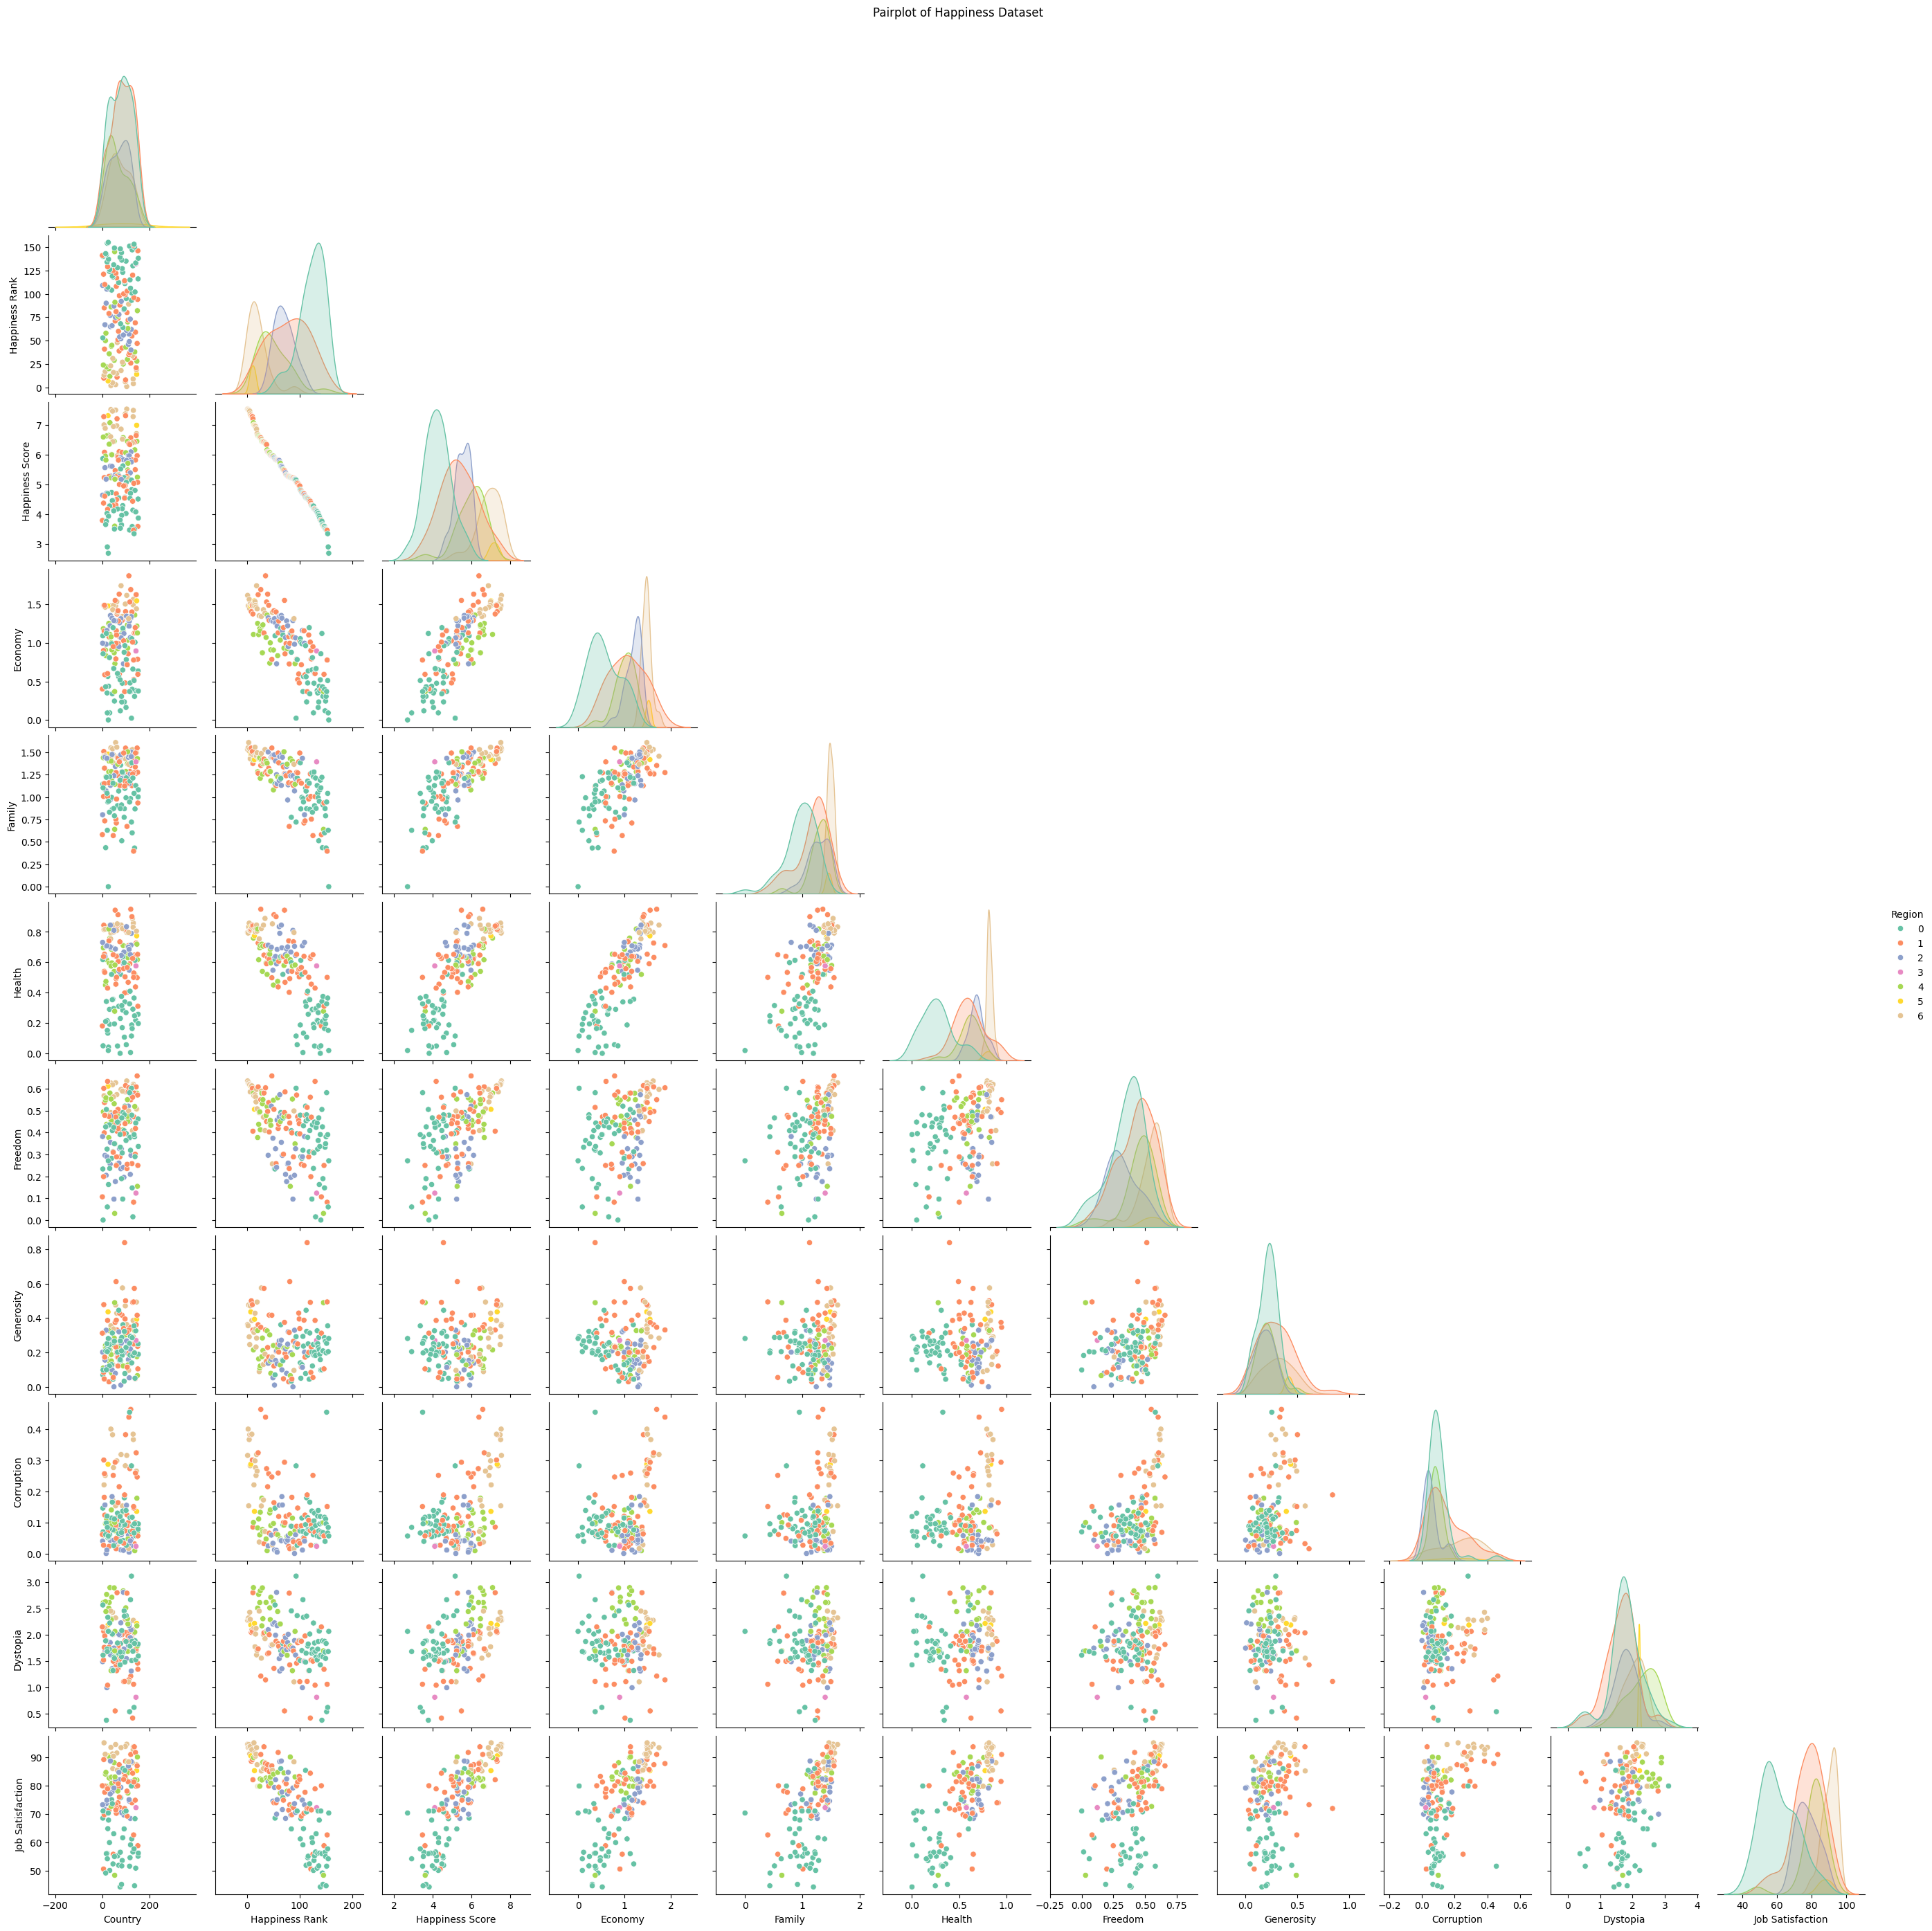

In [201]:
sns.pairplot(DataSet, hue='Region', diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Pairplot of Happiness Dataset', y=1.02)
plt.show()

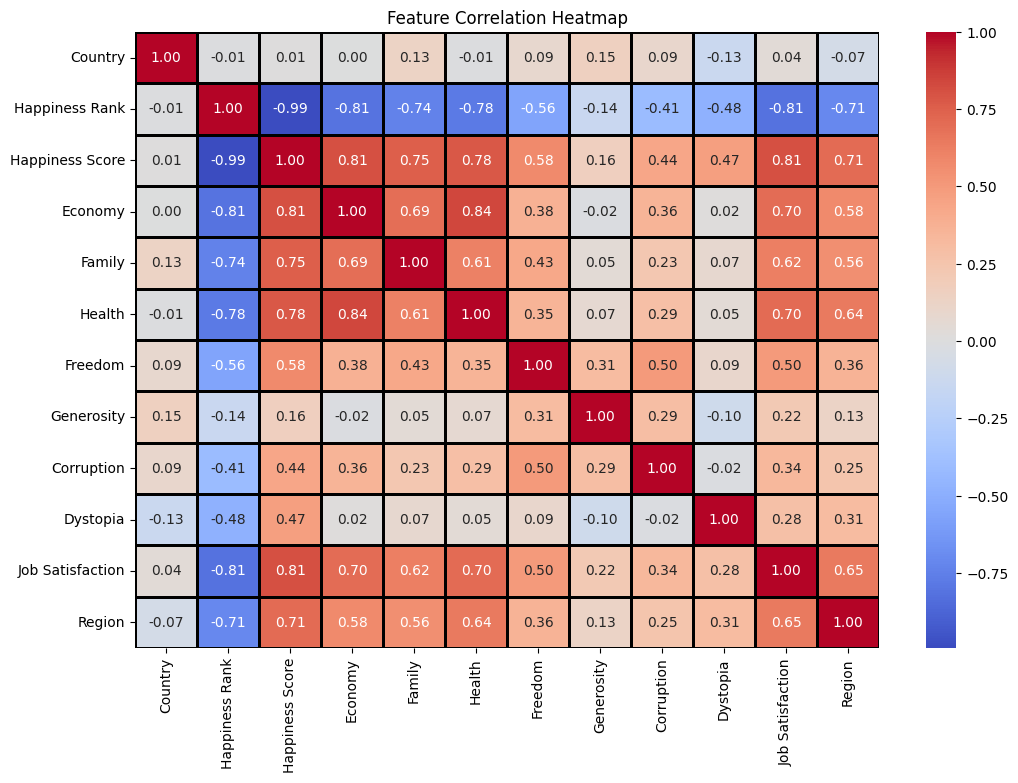

In [202]:
plt.figure(figsize=(12, 8))
sns.heatmap(DataSet.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Feature Correlation Heatmap')
plt.show()

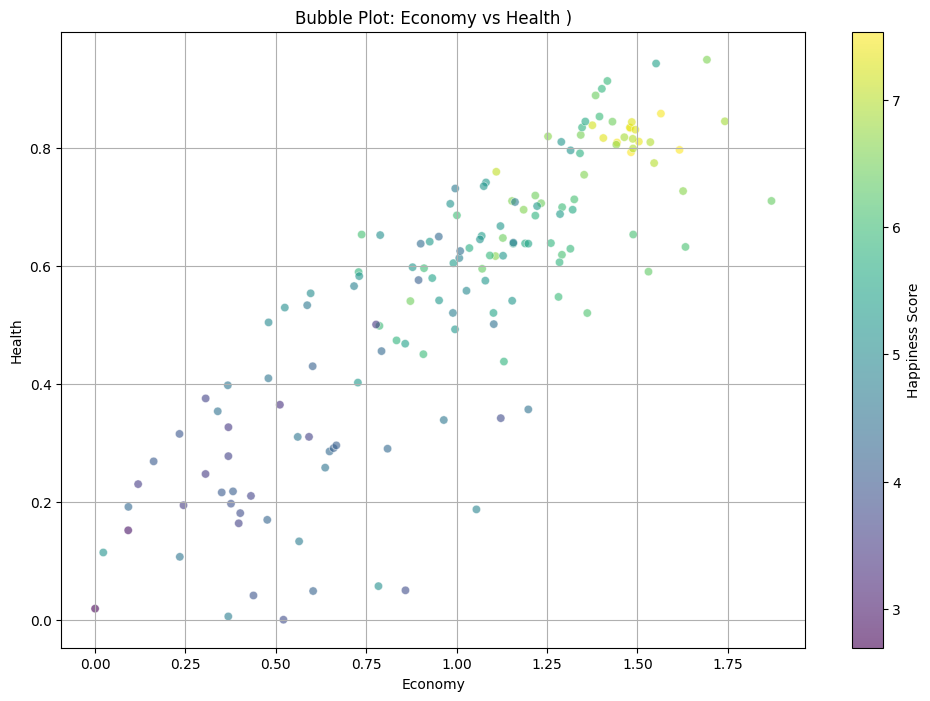

In [249]:
plt.figure(figsize=(12, 8))
plt.scatter(DataSet['Economy'], DataSet['Health'], c=DataSet['Happiness Score'], cmap='viridis', alpha=0.6, edgecolors="w", linewidth=0.5)
plt.colorbar(label='Happiness Score')
plt.xlabel('Economy')
plt.ylabel('Health')
plt.title('Bubble Plot: Economy vs Health )')
plt.grid(True)
plt.show()


In [204]:
from sklearn.preprocessing import PolynomialFeatures


In [205]:
#polynomial

In [206]:

degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)


In [207]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [208]:
X_test_poly = poly.transform(X_test)

In [209]:
y_pred = model.predict(X_test_poly)

In [210]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [211]:

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')
print(f'MAE: {mae}')

MSE: 4.413335030180886e-06
RMSE: 0.00210079390473718
R² Score: 0.9999961635672275
MAE: 0.0013795657575003536


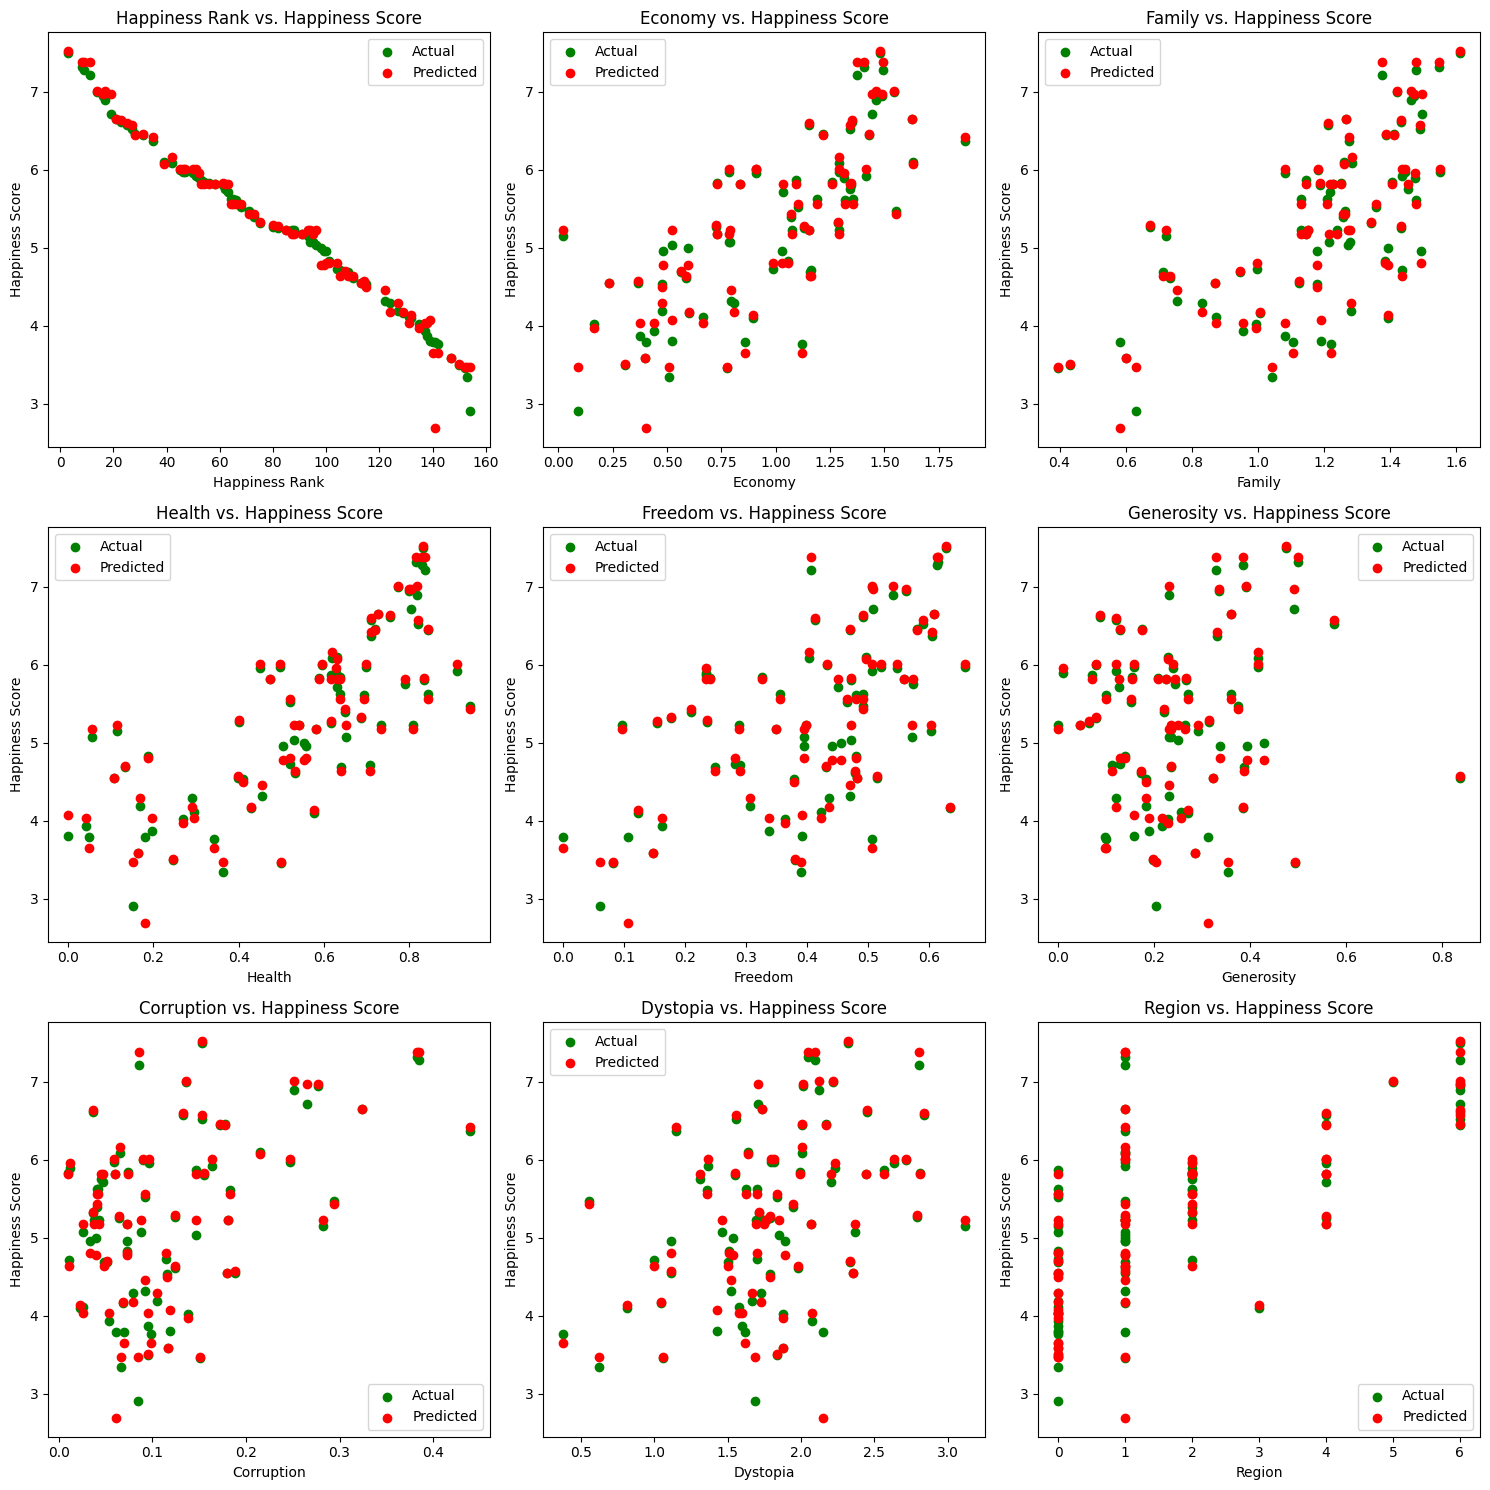

In [246]:
fig, axes = plt.subplots(3,3, figsize=(15, 15))
axes = axes.ravel()
countries = ["Happiness Rank","Economy","Family","Health","Freedom","Generosity","Corruption","Dystopia","Region"]

for i, col in enumerate(countries):
    axes[i].scatter(X_test[col], y_test, color='green', label='Actual')
    axes[i].scatter(X_test[col], y_pred, color='red', label='Predicted')
    axes[i].set_title(f'{col} vs. Happiness Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Happiness Score')
    axes[i].legend()

plt.tight_layout()
plt.show()

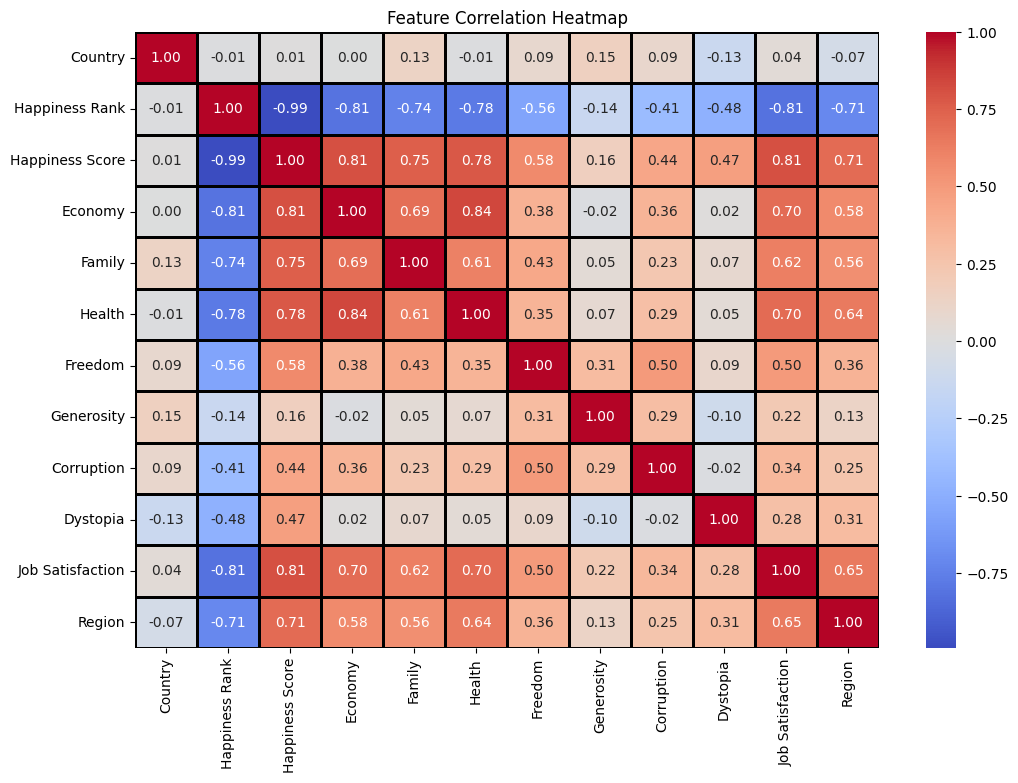

In [247]:
plt.figure(figsize=(12, 8))
sns.heatmap(DataSet.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Feature Correlation Heatmap')
plt.show()

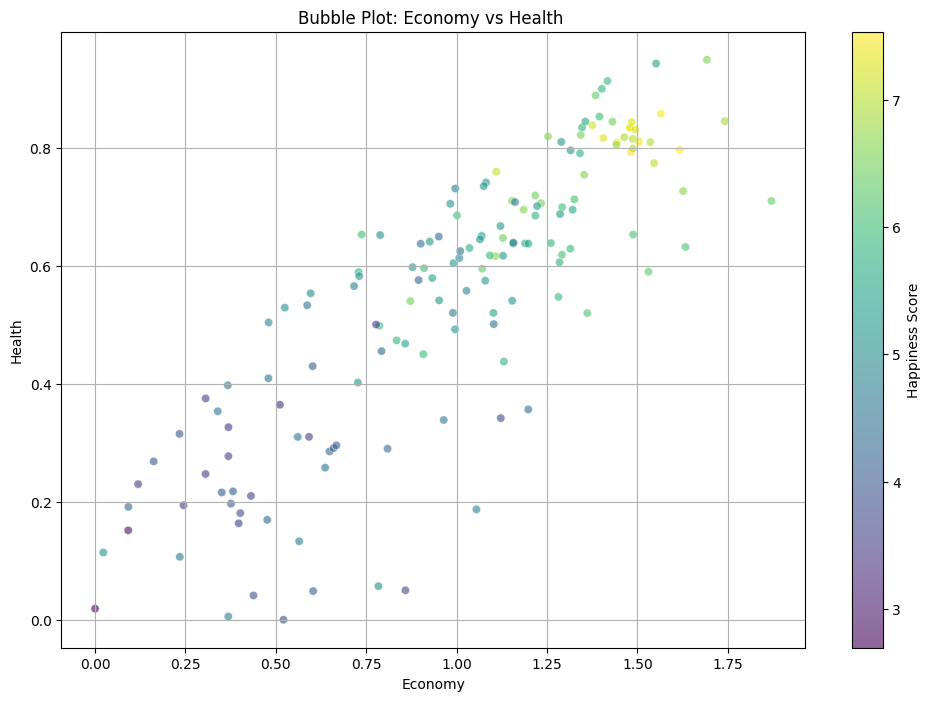

In [251]:
plt.figure(figsize=(12, 8))
plt.scatter(DataSet['Economy'], DataSet['Health'], c=DataSet['Happiness Score']*1, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=0.5)
plt.colorbar(label='Happiness Score')
plt.xlabel('Economy')
plt.ylabel('Health')
plt.title('Bubble Plot: Economy vs Health ')
plt.grid(True)
plt.show()

In [212]:
#multiple regression

In [213]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [214]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [226]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [227]:

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')
print(f'MAE: {mae}')

MSE: 0.018208375328832505
RMSE: 0.13493841309587312
R² Score: 0.9841717867856176
MAE: 0.10354225192869525


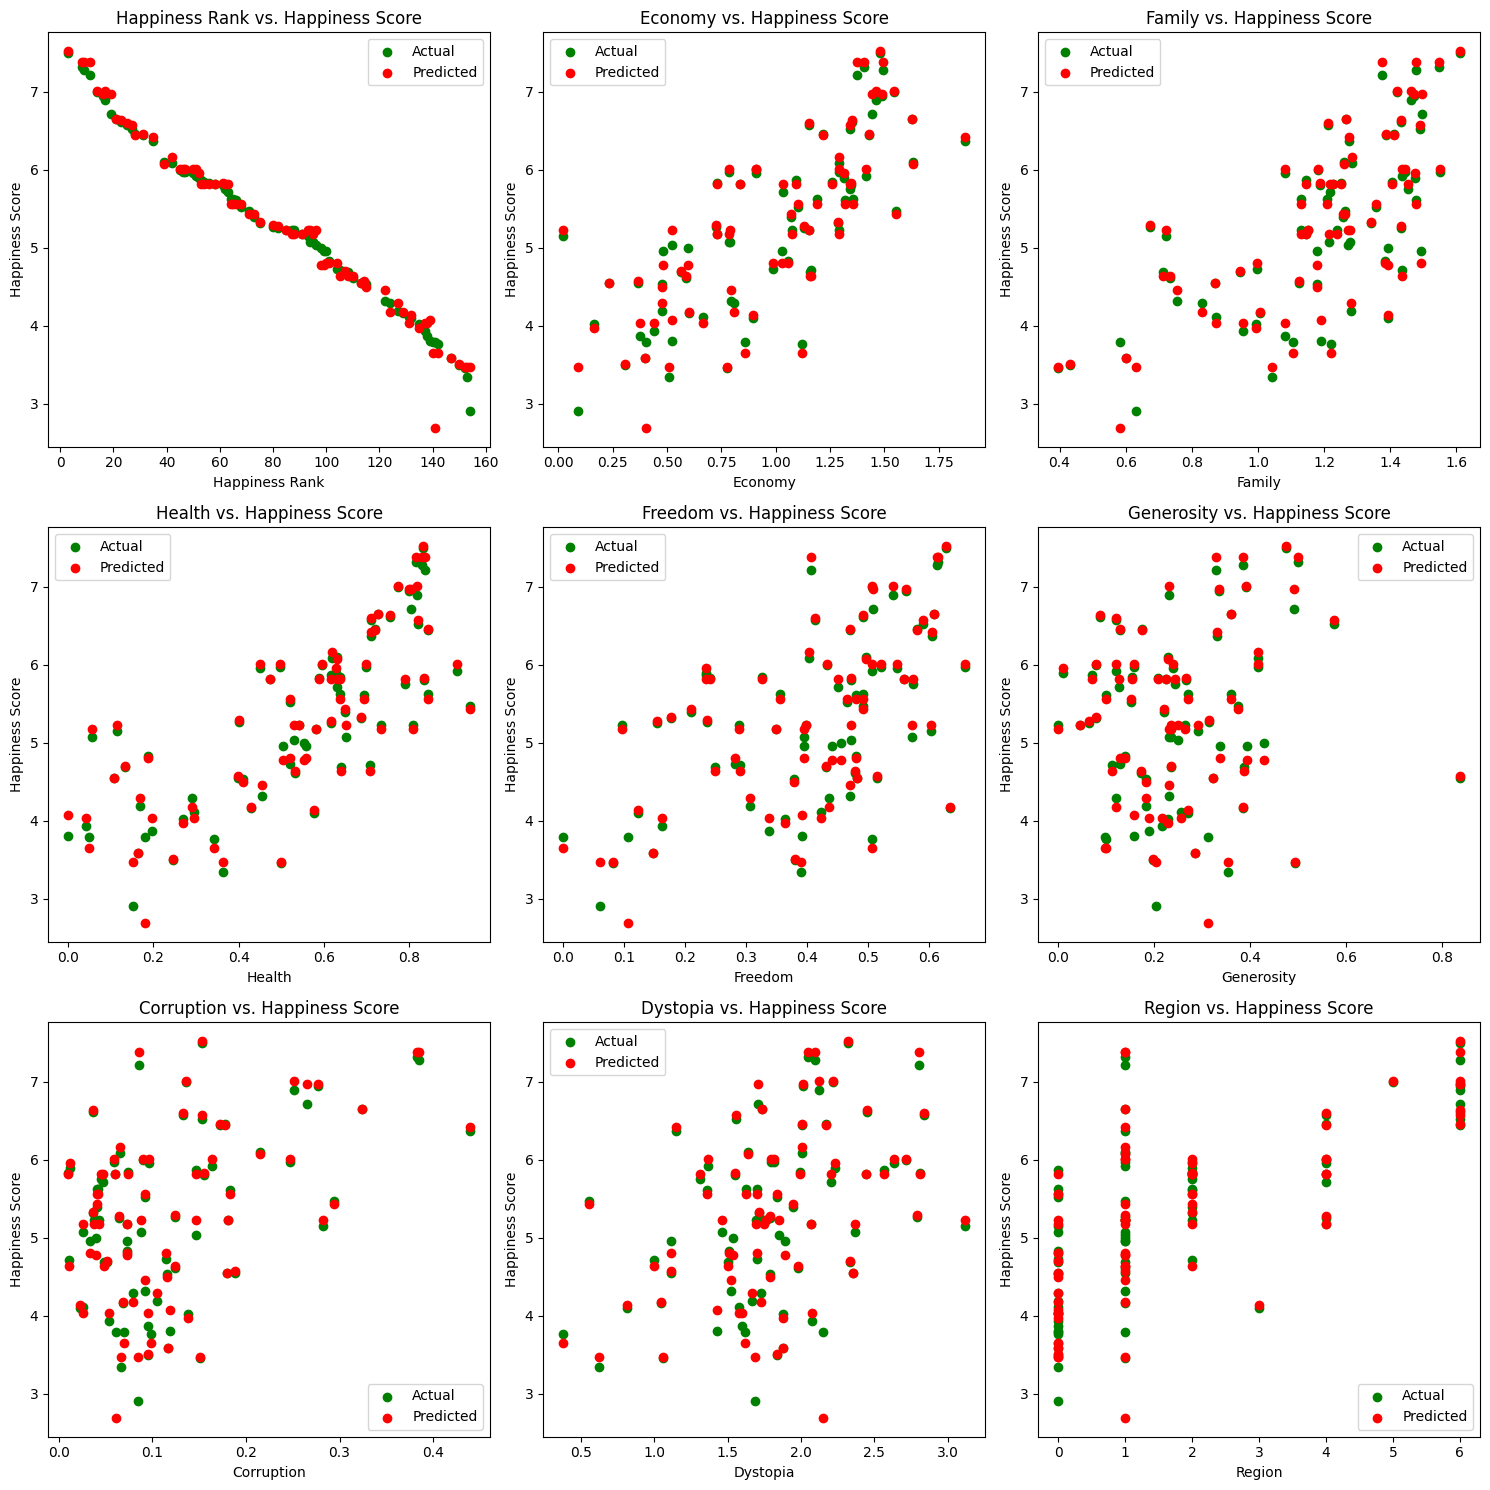

In [252]:
fig, axes = plt.subplots(3,3, figsize=(15, 15))
axes = axes.ravel()
countries = ["Happiness Rank","Economy","Family","Health","Freedom","Generosity","Corruption","Dystopia","Region"]

for i, col in enumerate(countries):
    axes[i].scatter(X_test[col], y_test, color='green', label='Actual')
    axes[i].scatter(X_test[col], y_pred, color='red', label='Predicted')
    axes[i].set_title(f'{col} vs. Happiness Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Happiness Score')
    axes[i].legend()

plt.tight_layout()
plt.show()

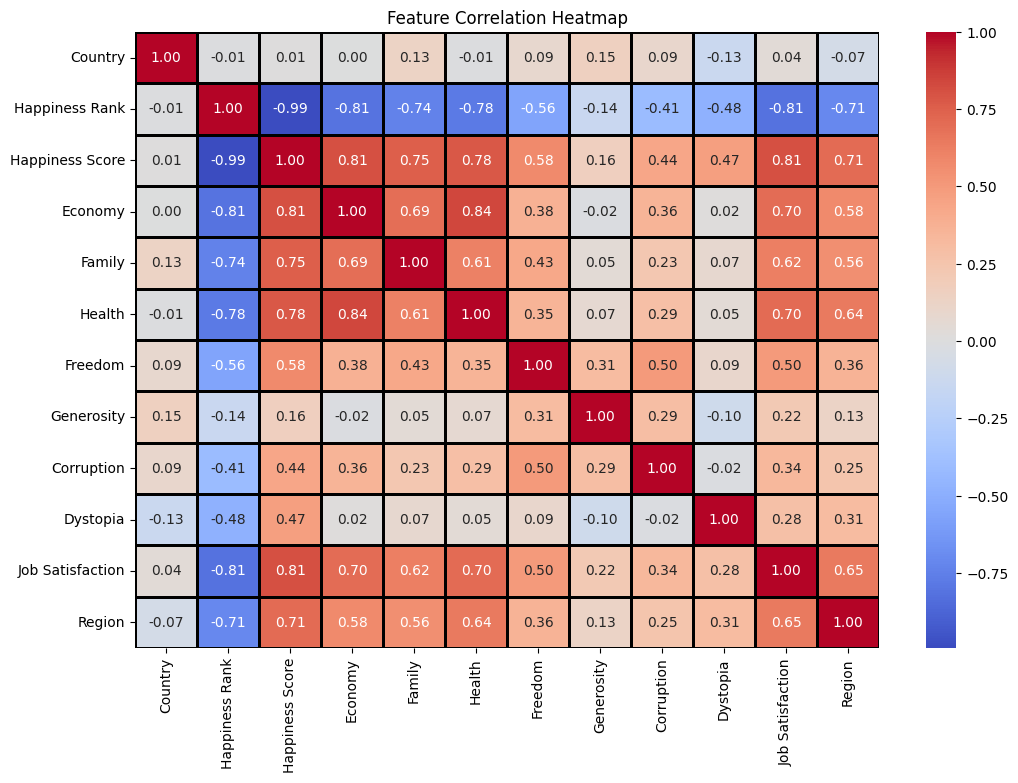

In [255]:
plt.figure(figsize=(12, 8))
sns.heatmap(DataSet.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Feature Correlation Heatmap')
plt.show()

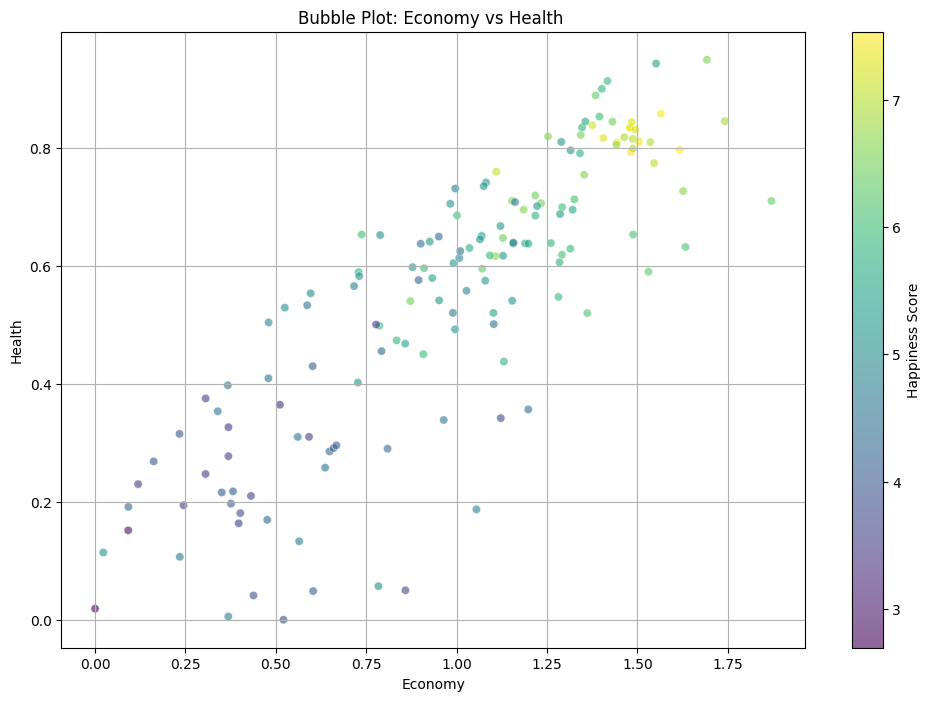

In [258]:
plt.figure(figsize=(12, 8))
plt.scatter(DataSet['Economy'], DataSet['Health'], c=DataSet['Happiness Score']*1, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=0.5)
plt.colorbar(label='Happiness Score')
plt.xlabel('Economy')
plt.ylabel('Health')
plt.title('Bubble Plot: Economy vs Health ')
plt.grid(True)
plt.show()

In [228]:
#support vector regression

In [229]:
from sklearn.svm import SVR
model = SVR(kernel = 'rbf',C=1.0,epsilon=0.1)
model.fit(X_train,y_train)

SVR()

In [230]:
y_pred = model.predict(X_test)


In [231]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [232]:

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')
print(f'MAE: {mae}')

MSE: 0.043083490438810094
RMSE: 0.20756562923280455
R² Score: 0.9625482965739692
MAE: 0.15483379562115016


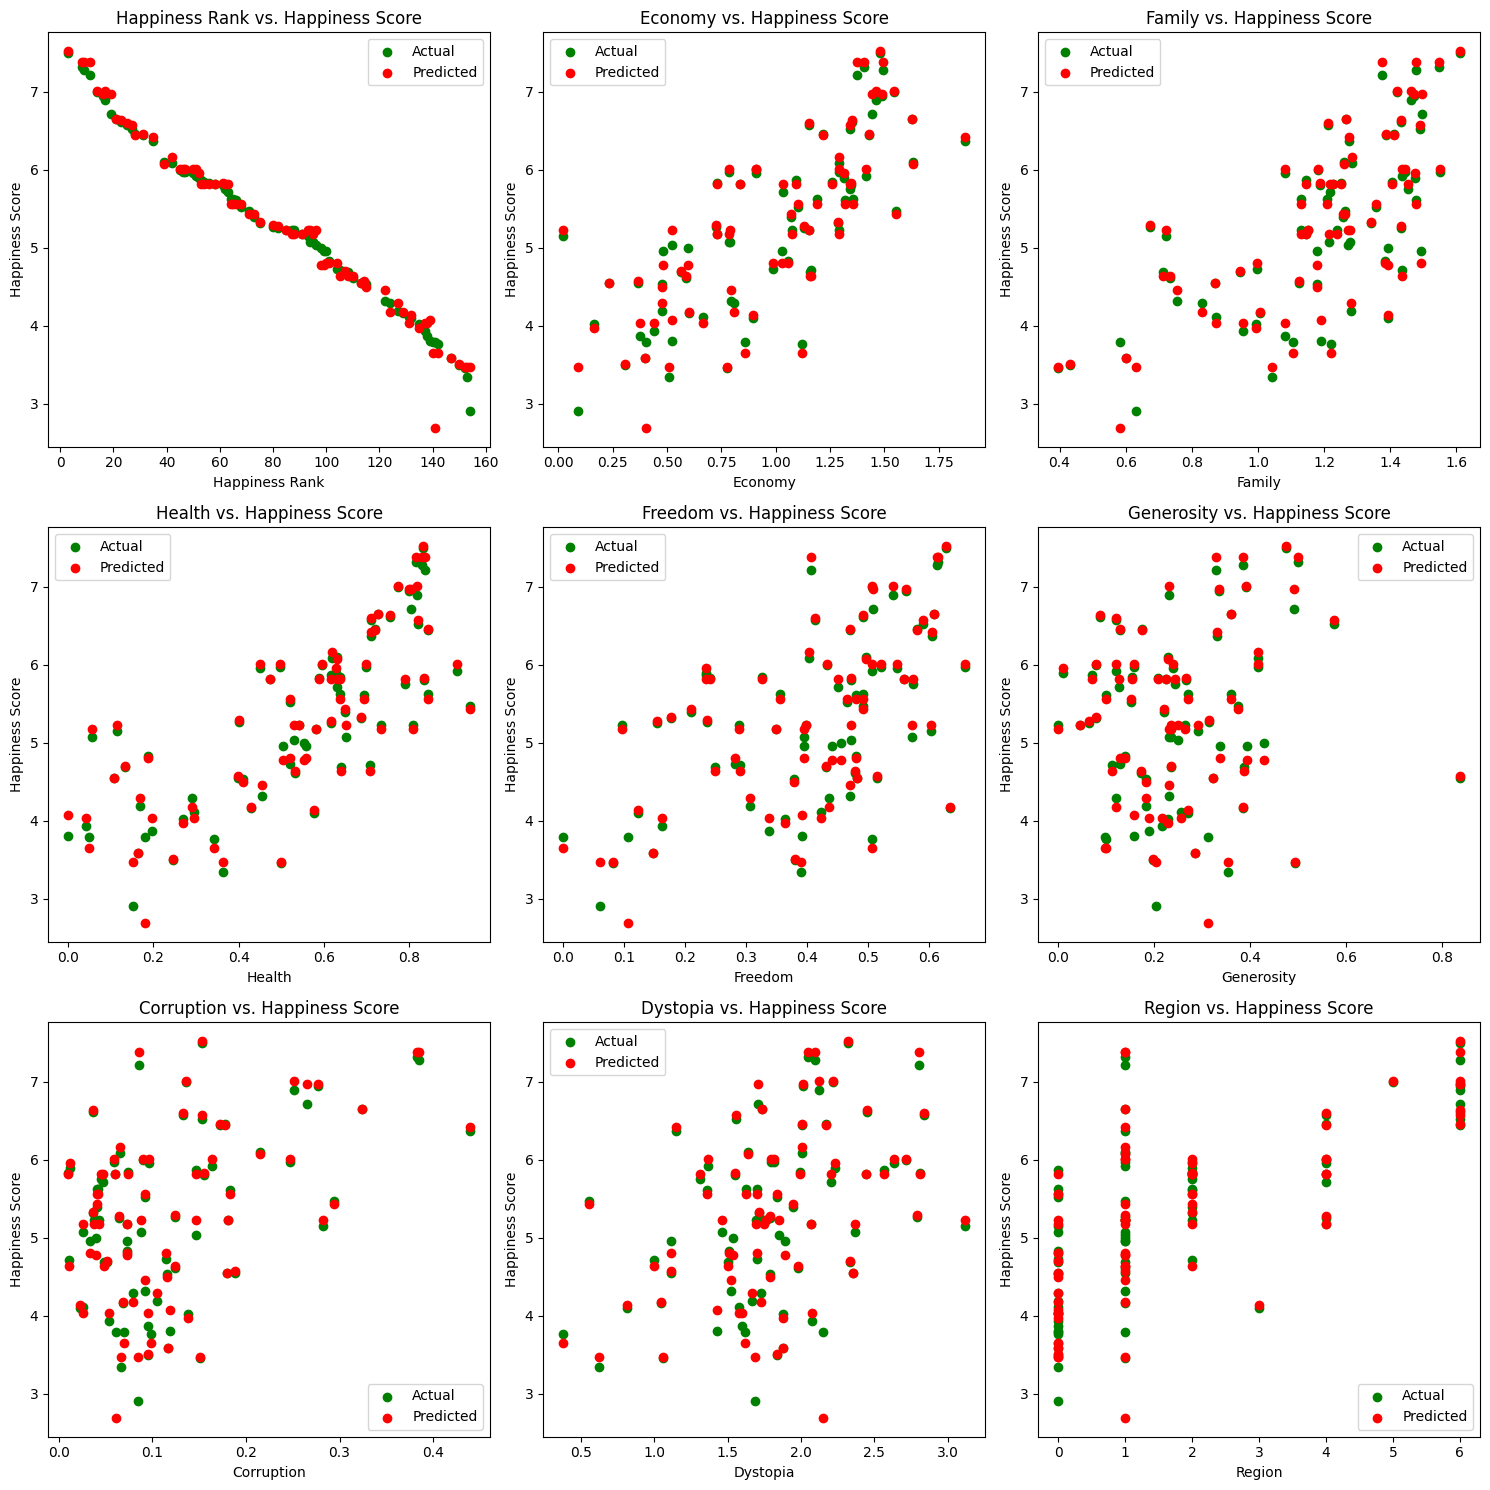

In [253]:
fig, axes = plt.subplots(3,3, figsize=(15, 15))
axes = axes.ravel()
countries = ["Happiness Rank","Economy","Family","Health","Freedom","Generosity","Corruption","Dystopia","Region"]

for i, col in enumerate(countries):
    axes[i].scatter(X_test[col], y_test, color='green', label='Actual')
    axes[i].scatter(X_test[col], y_pred, color='red', label='Predicted')
    axes[i].set_title(f'{col} vs. Happiness Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Happiness Score')
    axes[i].legend()

plt.tight_layout()
plt.show()

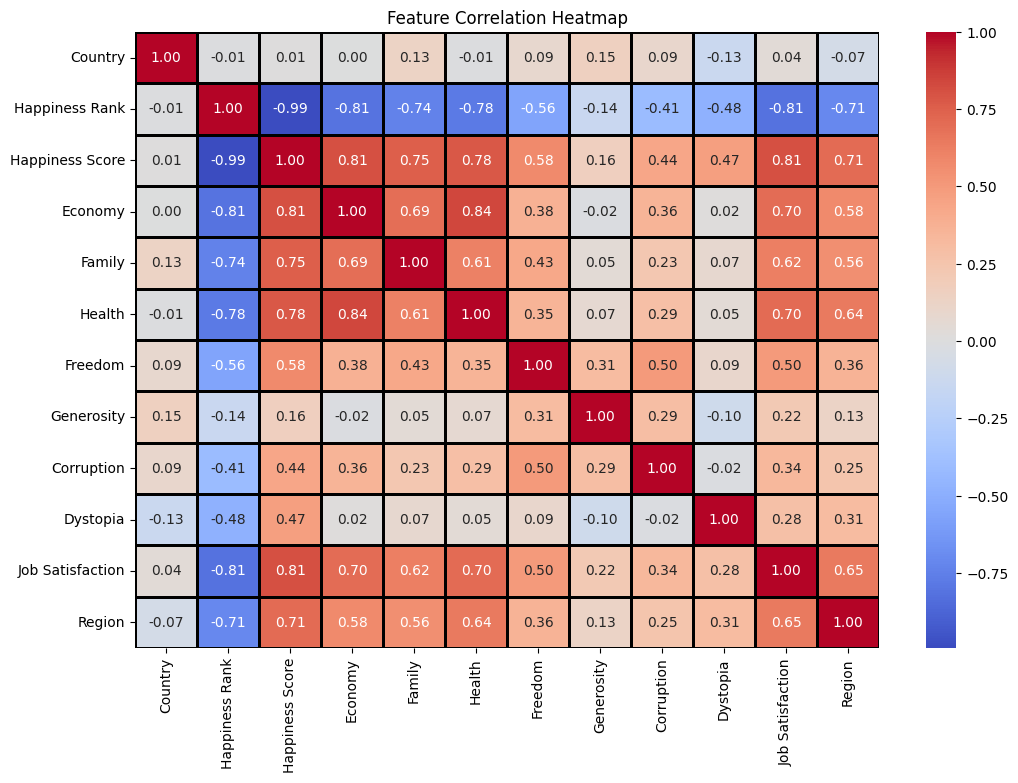

In [256]:
plt.figure(figsize=(12, 8))
sns.heatmap(DataSet.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Feature Correlation Heatmap')
plt.show()

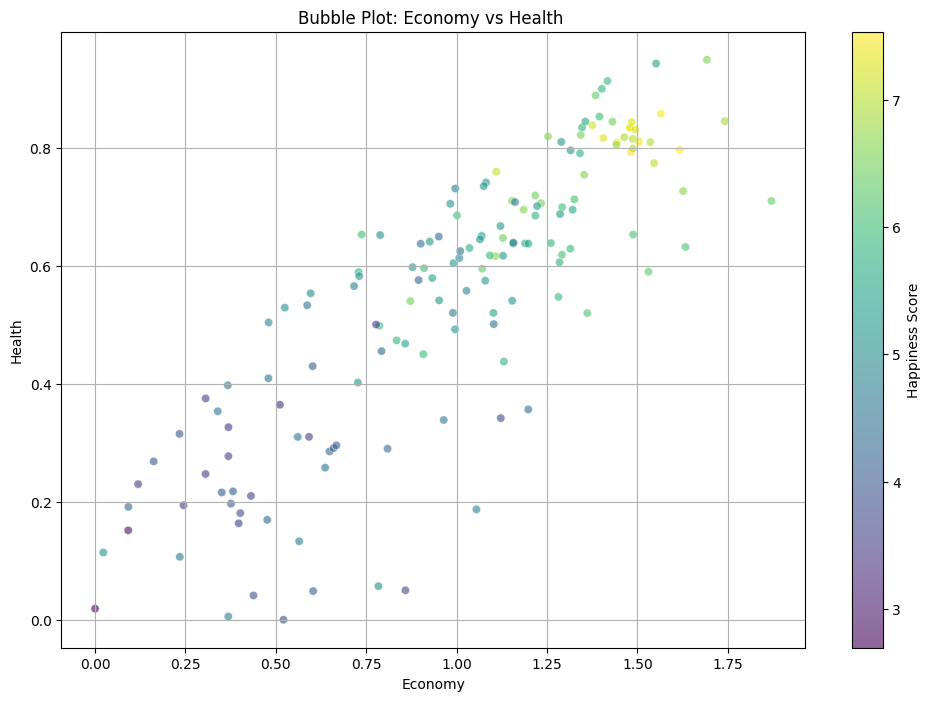

In [259]:
plt.figure(figsize=(12, 8))
plt.scatter(DataSet['Economy'], DataSet['Health'], c=DataSet['Happiness Score']*1, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=0.5)
plt.colorbar(label='Happiness Score')
plt.xlabel('Economy')
plt.ylabel('Health')
plt.title('Bubble Plot: Economy vs Health ')
plt.grid(True)
plt.show()

In [233]:
#decsion tree

In [242]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=10, random_state=0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [243]:
y_pred = dt_reg.predict(X_test)


In [244]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [245]:

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')
print(f'MAE: {mae}')

MSE: 0.02781525279907492
RMSE: 0.1667790538379293
R² Score: 0.9758207009705828
MAE: 0.08583113742857149


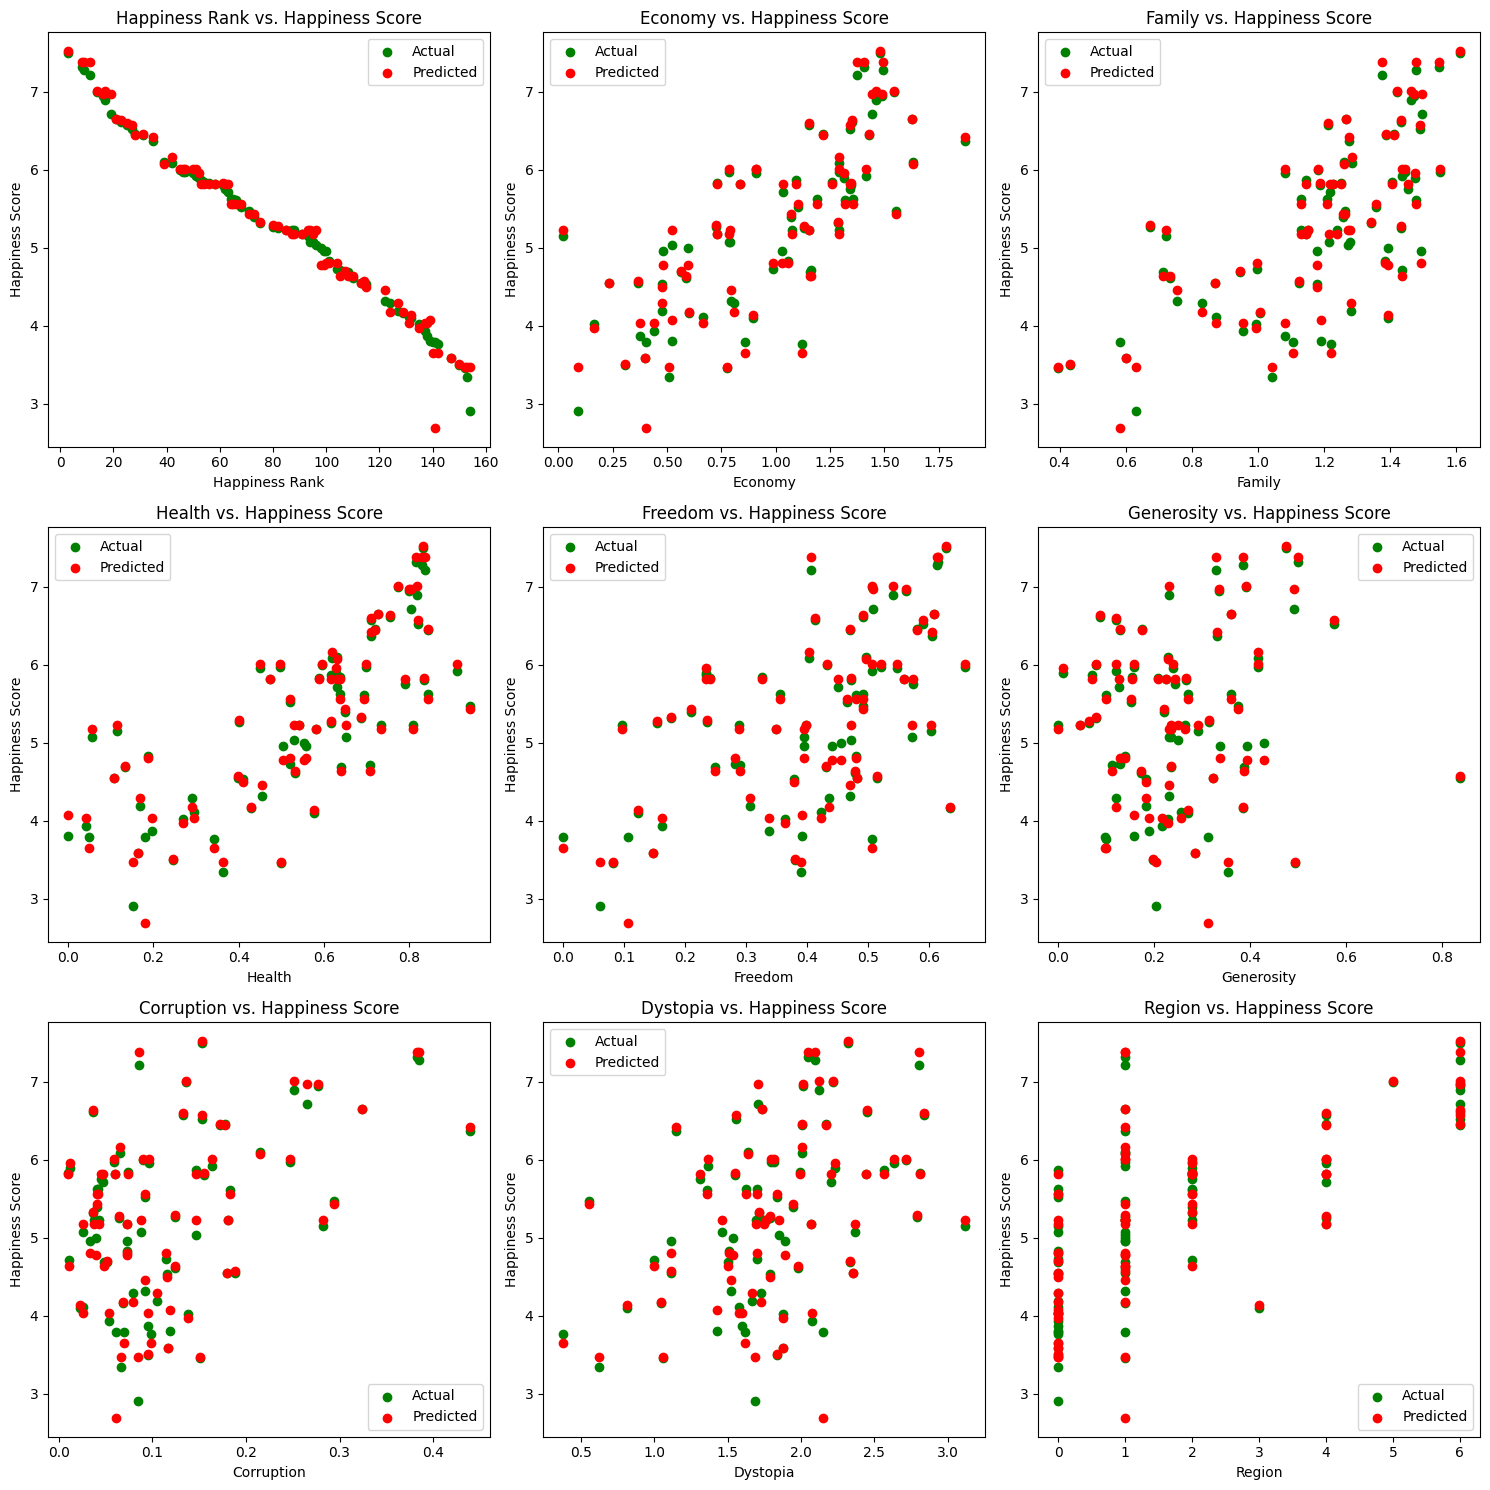

In [254]:
fig, axes = plt.subplots(3,3, figsize=(15, 15))
axes = axes.ravel()
countries = ["Happiness Rank","Economy","Family","Health","Freedom","Generosity","Corruption","Dystopia","Region"]

for i, col in enumerate(countries):
    axes[i].scatter(X_test[col], y_test, color='green', label='Actual')
    axes[i].scatter(X_test[col], y_pred, color='red', label='Predicted')
    axes[i].set_title(f'{col} vs. Happiness Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Happiness Score')
    axes[i].legend()

plt.tight_layout()
plt.show()

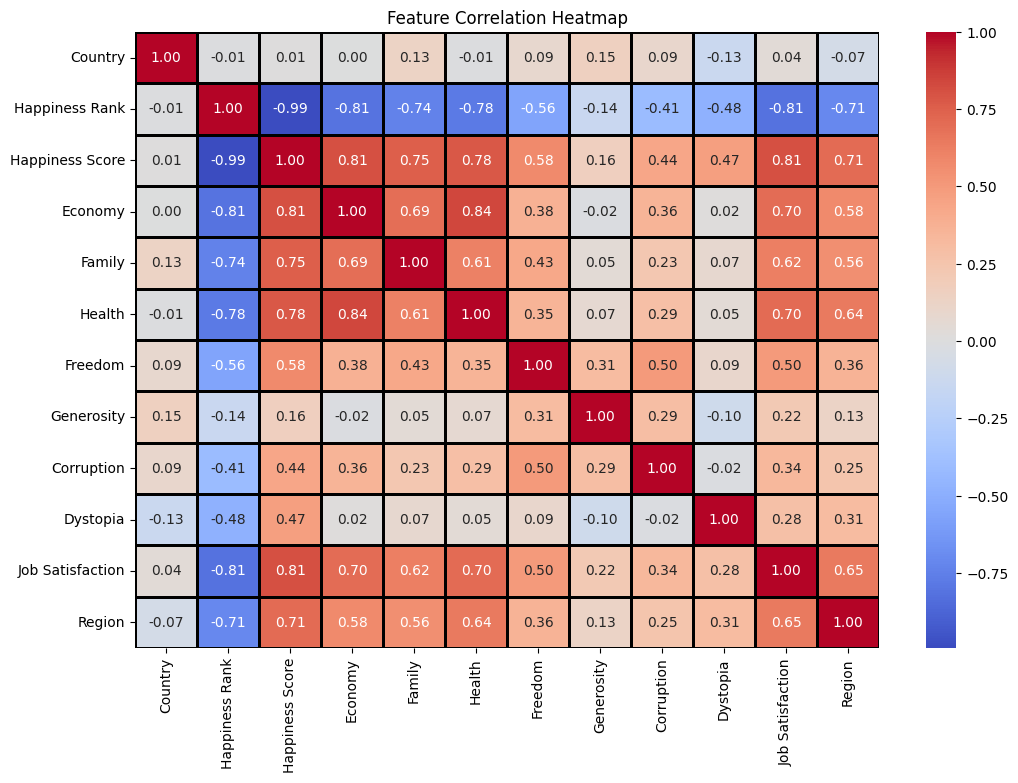

In [257]:
plt.figure(figsize=(12, 8))
sns.heatmap(DataSet.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Feature Correlation Heatmap')
plt.show()

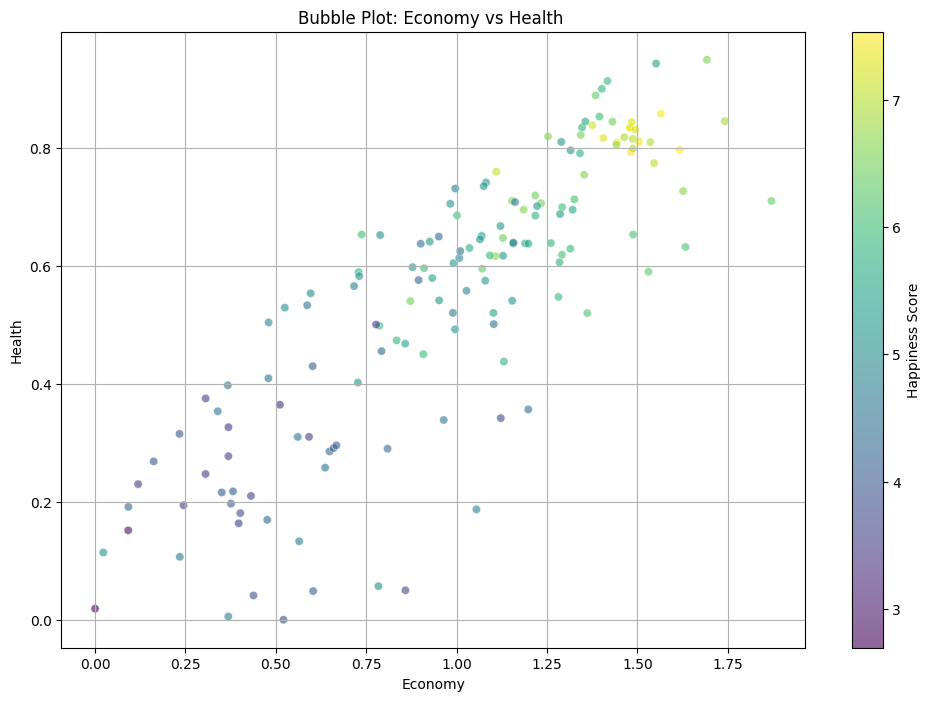

In [260]:
plt.figure(figsize=(12, 8))
plt.scatter(DataSet['Economy'], DataSet['Health'], c=DataSet['Happiness Score']*1, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=0.5)
plt.colorbar(label='Happiness Score')
plt.xlabel('Economy')
plt.ylabel('Health')
plt.title('Bubble Plot: Economy vs Health ')
plt.grid(True)
plt.show()